In [1]:
!pip install nltk
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [2]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohammad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
DATASET_COLUMNS = ['target', 'ids', 'date', 'status', 'user', 'text']
df = pd.read_csv(r'C:\Users\mohammad\training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1', names=DATASET_COLUMNS)
df.head()

,target,ids,date,status,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [38]:
df.info

<bound method DataFrame.info of          target         ids                          date    status  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot

In [39]:
df = df.drop(['ids', 'date', 'status', 'user'], axis=1)
df.head

<bound method NDFrame.head of          target                                               text
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1             0  is upset that he can't update his Facebook by ...
2             0  @Kenichan I dived many times for the ball. Man...
3             0    my whole body feels itchy and like its on fire 
4             0  @nationwideclass no, it's not behaving at all....
...         ...                                                ...
1599995       4  Just woke up. Having no school is the best fee...
1599996       4  TheWDB.com - Very cool to hear old Walt interv...
1599997       4  Are you ready for your MoJo Makeover? Ask me f...
1599998       4  Happy 38th Birthday to my boo of alll time!!! ...
1599999       4  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]>

<AxesSubplot:xlabel='target', ylabel='count'>

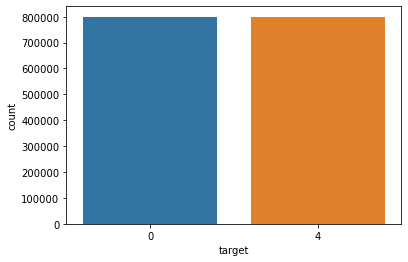

In [40]:
import seaborn as sns
sns.countplot(data=df, x='target')

In [16]:
stop_words = stopwords.words('english')
stop_words.remove('not')

In [41]:
import re
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations


def cleaning_text(x):
    temp =" ".join([w for w in str(x).split() if w not in stop_words])
    translator =  str.maketrans("", "", punctuations_list)
    temp =  str(temp).translate(translator)
    temp = re.sub('((www.[^s]+)|(https?://[^s]+))',' ',temp)
    temp = re.sub('[0-9]+', '', temp)
    #  remove special characters
    temp = re.sub(r"[^a-zA-Z0-9]+", ' ', temp)
    return temp.lower()

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=1200)
vectorized_data = count_vectorizer.fit_transform(df['text']).toarray()

y= df['target']

In [42]:
df.head

<bound method NDFrame.head of          target                                               text
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1             0  is upset that he can't update his Facebook by ...
2             0  @Kenichan I dived many times for the ball. Man...
3             0    my whole body feels itchy and like its on fire 
4             0  @nationwideclass no, it's not behaving at all....
...         ...                                                ...
1599995       4  Just woke up. Having no school is the best fee...
1599996       4  TheWDB.com - Very cool to hear old Walt interv...
1599997       4  Are you ready for your MoJo Makeover? Ask me f...
1599998       4  Happy 38th Birthday to my boo of alll time!!! ...
1599999       4  happy #charitytuesday @theNSPCC @SparksCharity...

[1600000 rows x 2 columns]>

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=1200)
vectorized_data = count_vectorizer.fit_transform(df['text']).toarray()

y= df['target']

In [44]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [45]:
X=df['text']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)

In [46]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [47]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [48]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80    159494
           4       0.80      0.81      0.80    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



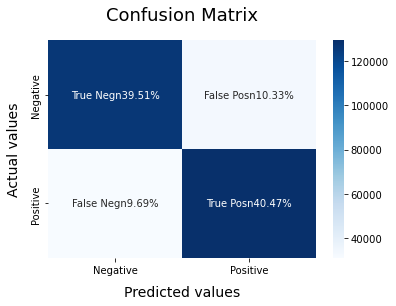

In [49]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)